<h2>Working With Missing Data</h2>
<h3>References:</h3>
<h3>General techniques</h3>
https://pandas.pydata.org/pandas-docs/stable/missing_data.html<br/>
<h3>Missing Values in a Timeseries</h3>
https://www.kaggle.com/juejuewang/handle-missing-values-in-time-series-for-beginners

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('VehicleTraffic.csv', parse_dates=[0], index_col=0)

In [3]:
# Measurements taken at different times
df

,Vehicles,Average Speed (mph),Accidents
TimeStamp,,,
2018-12-04 13:00:00,95.0,38.0,0.0
2018-12-04 14:00:00,90.0,32.0,1.0
2018-12-04 15:00:00,98.0,30.0,1.0
2018-12-04 16:00:00,98.0,26.0,3.0
2018-12-04 17:00:00,NaN,NaN,NaN
2018-12-04 18:00:00,NaN,NaN,NaN
2018-12-04 19:00:00,84.0,35.0,2.0
2018-12-04 20:00:00,82.0,40.0,0.0
2018-12-04 21:00:00,77.0,45.0,0.0


In [4]:
# Remove NaN values
df.dropna()

,Vehicles,Average Speed (mph),Accidents
TimeStamp,,,
2018-12-04 13:00:00,95.0,38.0,0.0
2018-12-04 14:00:00,90.0,32.0,1.0
2018-12-04 15:00:00,98.0,30.0,1.0
2018-12-04 16:00:00,98.0,26.0,3.0
2018-12-04 19:00:00,84.0,35.0,2.0
2018-12-04 20:00:00,82.0,40.0,0.0
2018-12-04 21:00:00,77.0,45.0,0.0
2018-12-04 22:00:00,93.0,45.0,1.0


In [5]:
# Mean values of numeric columns
df.mean()

Vehicles               89.625
Average Speed (mph)    36.375
Accidents               1.000
dtype: float64

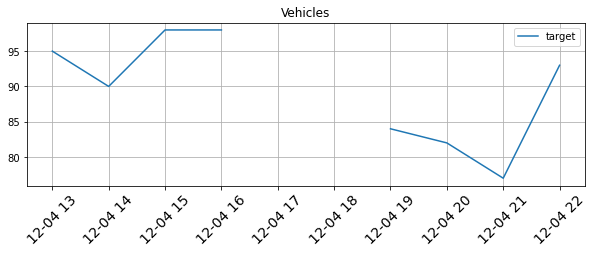

In [6]:
# Let's visualize vehicles data
# How does missing data show up?
plt.figure(figsize=(10,3))
plt.title('Vehicles')
plt.plot(df['Vehicles'], label='target')
plt.xticks(fontsize=14, rotation=45)
plt.legend()
plt.grid()

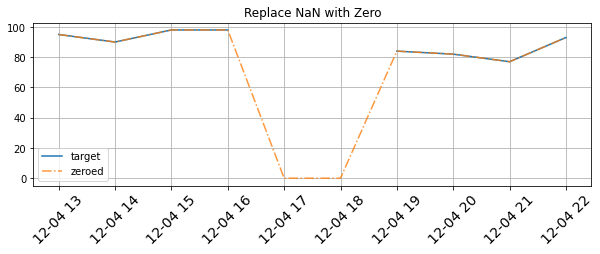

In [7]:
# Replace missing values with zero

plt.figure(figsize=(10,3))
plt.title('Replace NaN with Zero')
plt.plot(df['Vehicles'], label='target')

# fillna to replace NaNs with provided value
vehicles = df['Vehicles'].fillna(0)

plt.plot(vehicles,ls='-.',alpha=0.8,label='zeroed')
plt.xticks(fontsize=14, rotation=45)
plt.legend()
plt.grid()

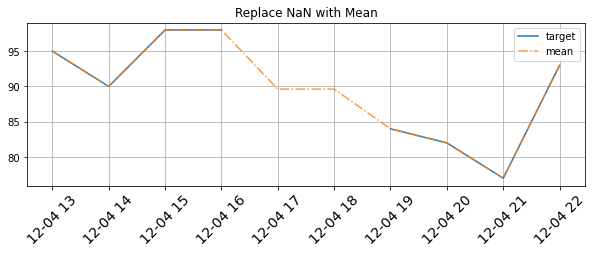

In [8]:
# Replace missing values with mean value for that attribute
plt.figure(figsize=(10,3))
plt.title('Replace NaN with Mean')
plt.plot(df['Vehicles'], label='target')

# fillna to replace NaNs with provided value
vehicles = df['Vehicles'].fillna(df['Vehicles'].mean())

plt.plot(vehicles,ls='-.',alpha=0.8,label='mean')
plt.xticks(fontsize=14, rotation=45)
plt.legend()
plt.grid()

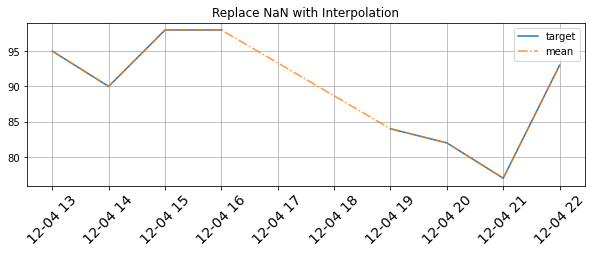

In [9]:
# Replace missing values with interpolated value for that attribute
plt.figure(figsize=(10,3))
plt.title('Replace NaN with Interpolation')
plt.plot(df['Vehicles'], label='target')

vehicles = df['Vehicles'].interpolate()

plt.plot(vehicles,ls='-.',alpha=0.8,label='mean')
plt.xticks(fontsize=14, rotation=45)
plt.legend()
plt.grid()

In [10]:
vehicles

TimeStamp
2018-12-04 13:00:00    95.000000
2018-12-04 14:00:00    90.000000
2018-12-04 15:00:00    98.000000
2018-12-04 16:00:00    98.000000
2018-12-04 17:00:00    93.333333
2018-12-04 18:00:00    88.666667
2018-12-04 19:00:00    84.000000
2018-12-04 20:00:00    82.000000
2018-12-04 21:00:00    77.000000
2018-12-04 22:00:00    93.000000
Name: Vehicles, dtype: float64

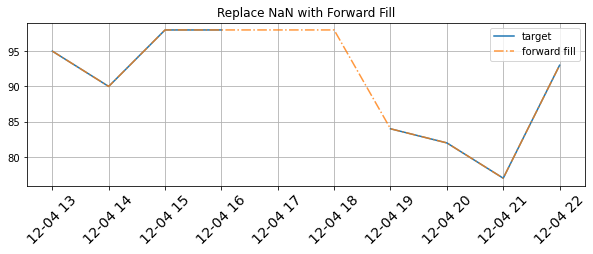

In [11]:
# Replace missing values with previous valid value for that attribute
plt.figure(figsize=(10,3))
plt.title('Replace NaN with Forward Fill')
plt.plot(df['Vehicles'], label='target')

vehicles = df['Vehicles'].fillna(method='ffill')

plt.plot(vehicles,ls='-.',alpha=0.8,label='forward fill')
plt.xticks(fontsize=14, rotation=45)
plt.legend()
plt.grid()

In [12]:
vehicles

TimeStamp
2018-12-04 13:00:00    95.0
2018-12-04 14:00:00    90.0
2018-12-04 15:00:00    98.0
2018-12-04 16:00:00    98.0
2018-12-04 17:00:00    98.0
2018-12-04 18:00:00    98.0
2018-12-04 19:00:00    84.0
2018-12-04 20:00:00    82.0
2018-12-04 21:00:00    77.0
2018-12-04 22:00:00    93.0
Name: Vehicles, dtype: float64

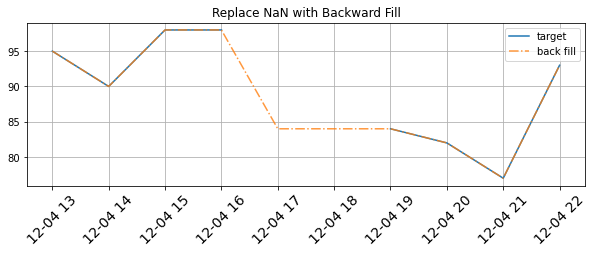

In [13]:
# Replace missing values with next valid value for that attribute
plt.figure(figsize=(10,3))
plt.title('Replace NaN with Backward Fill')
plt.plot(df['Vehicles'], label='target')

vehicles = df['Vehicles'].fillna(method='bfill')

plt.plot(vehicles,ls='-.',alpha=0.8,label='back fill')
plt.xticks(fontsize=14, rotation=45)
plt.legend()
plt.grid()

In [14]:
vehicles

TimeStamp
2018-12-04 13:00:00    95.0
2018-12-04 14:00:00    90.0
2018-12-04 15:00:00    98.0
2018-12-04 16:00:00    98.0
2018-12-04 17:00:00    84.0
2018-12-04 18:00:00    84.0
2018-12-04 19:00:00    84.0
2018-12-04 20:00:00    82.0
2018-12-04 21:00:00    77.0
2018-12-04 22:00:00    93.0
Name: Vehicles, dtype: float64

In [15]:
df

,Vehicles,Average Speed (mph),Accidents
TimeStamp,,,
2018-12-04 13:00:00,95.0,38.0,0.0
2018-12-04 14:00:00,90.0,32.0,1.0
2018-12-04 15:00:00,98.0,30.0,1.0
2018-12-04 16:00:00,98.0,26.0,3.0
2018-12-04 17:00:00,NaN,NaN,NaN
2018-12-04 18:00:00,NaN,NaN,NaN
2018-12-04 19:00:00,84.0,35.0,2.0
2018-12-04 20:00:00,82.0,40.0,0.0
2018-12-04 21:00:00,77.0,45.0,0.0


In [16]:
# Now that we know different ways of handling missing values
# Let's pick an appropriate scheme for replacing missing values

# Vehicles and Average Speed...interpolate
df['Vehicles'] = df['Vehicles'].interpolate()
df['Average Speed (mph)'] = df['Average Speed (mph)'].interpolate()
# Accidents...interpolate or use mean values
df['Accidents'] = df['Accidents'].fillna(df['Accidents'].mean())

In [17]:
df

,Vehicles,Average Speed (mph),Accidents
TimeStamp,,,
2018-12-04 13:00:00,95.000000,38.0,0.0
2018-12-04 14:00:00,90.000000,32.0,1.0
2018-12-04 15:00:00,98.000000,30.0,1.0
2018-12-04 16:00:00,98.000000,26.0,3.0
2018-12-04 17:00:00,93.333333,29.0,1.0
2018-12-04 18:00:00,88.666667,32.0,1.0
2018-12-04 19:00:00,84.000000,35.0,2.0
2018-12-04 20:00:00,82.000000,40.0,0.0
2018-12-04 21:00:00,77.000000,45.0,0.0


<h3>Independent Data</h3>

In [18]:
# Example of data that is not time dependent
# Each row is independent
df = pd.read_csv('VehicleTrafficRoads.csv', index_col=0)

In [19]:
df

,Vehicles,Average Speed (mph),Accidents
Road,,,
A,95.0,38.0,0.0
B,90.0,32.0,1.0
C,98.0,30.0,1.0
D,98.0,26.0,3.0
E,NaN,NaN,NaN
F,NaN,NaN,NaN
G,84.0,35.0,2.0
H,82.0,40.0,0.0
I,77.0,45.0,0.0


In [20]:
df.mean()

Vehicles               89.625
Average Speed (mph)    36.375
Accidents               1.000
dtype: float64

In [21]:
# Substitute computed average of other rows
# In this case, Rows E and F look identical
# Data stored for Road E and F may not reflect reality

df.fillna(df.mean(numeric_only=True))

,Vehicles,Average Speed (mph),Accidents
Road,,,
A,95.000,38.000,0.0
B,90.000,32.000,1.0
C,98.000,30.000,1.0
D,98.000,26.000,3.0
E,89.625,36.375,1.0
F,89.625,36.375,1.0
G,84.000,35.000,2.0
H,82.000,40.000,0.0
I,77.000,45.000,0.0


In [22]:
# Better option here is to simply drop NA rows
# how = all Drop if all columns are NA
# how = any Drop if any one of the columns contain NA
df.dropna(how='all',inplace=True)

In [23]:
df

,Vehicles,Average Speed (mph),Accidents
Road,,,
A,95.0,38.0,0.0
B,90.0,32.0,1.0
C,98.0,30.0,1.0
D,98.0,26.0,3.0
G,84.0,35.0,2.0
H,82.0,40.0,0.0
I,77.0,45.0,0.0
J,93.0,45.0,1.0


<h3>Impute Missing Values from Similar Data</h3>

In [24]:
# Some instances have missing features
# There are three types of plants: Iris-setosa, Iris-virginica, Iris-versicolor
# In this case, we can find mean value of an attribute for each type of plant
# and use it to substitute the missing values
df = pd.read_csv('IrisMissingData.csv')

In [25]:
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,NaN,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [26]:
# Look for any columns that have NA
df.isna().any(axis=0)

sepal_length     True
sepal_width      True
petal_length     True
petal_width      True
class           False
dtype: bool

In [27]:
# Look for any rows that have NA
rows_missing_values = df.isna().any(axis=1)

In [28]:
df[rows_missing_values]

,sepal_length,sepal_width,petal_length,petal_width,class
6,4.6,NaN,1.4,0.3,Iris-setosa
7,5.0,3.4,NaN,0.2,Iris-setosa
12,4.8,3.0,1.4,NaN,Iris-setosa
62,NaN,2.2,4.0,1.0,Iris-versicolor
64,5.6,2.9,3.6,NaN,Iris-versicolor
80,5.5,NaN,NaN,1.1,Iris-versicolor
127,6.1,NaN,4.9,1.8,Iris-virginica
128,6.4,2.8,NaN,2.1,Iris-virginica
140,6.7,3.1,NaN,2.4,Iris-virginica
145,NaN,3.0,5.2,2.3,Iris-virginica


In [30]:
# Find Summary Statistics for Each Class
# Impute values based on class
# https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group
group_class = df.groupby('class')

In [31]:
# First few rows of each group
group_class.head(2)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica


In [32]:
# Attribute Mean value is different for each group
group_class.mean(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
class,,,,
Iris-setosa,5.006000,3.418367,1.463265,0.246939
Iris-versicolor,5.934694,2.777551,4.269388,1.326531
Iris-virginica,6.585714,2.973469,5.550000,2.026000


In [33]:
# Compared to mean value for entire dataset
df.mean(numeric_only=True)

sepal_length    5.836486
sepal_width     3.056463
petal_length    3.748630
petal_width     1.205405
dtype: float64

In [37]:
# For each group, use group level averages to fill missing values
df['sepal_length'] = group_class['sepal_length'].transform(lambda x: x.fillna(x.mean()))
df['sepal_width'] = group_class['sepal_width'].transform(lambda x: x.fillna(x.mean()))
df['petal_length'] = group_class['petal_length'].transform(lambda x: x.fillna(x.mean()))
df['petal_width'] = group_class['petal_width'].transform(lambda x: x.fillna(x.mean()))

In [38]:
# Let's now check the rows that had missing values
df[rows_missing_values]

,sepal_length,sepal_width,petal_length,petal_width,class
6,4.600000,3.418367,1.400000,0.300000,Iris-setosa
7,5.000000,3.400000,1.463265,0.200000,Iris-setosa
12,4.800000,3.000000,1.400000,0.246939,Iris-setosa
62,5.934694,2.200000,4.000000,1.000000,Iris-versicolor
64,5.600000,2.900000,3.600000,1.326531,Iris-versicolor
80,5.500000,2.777551,4.269388,1.100000,Iris-versicolor
127,6.100000,2.973469,4.900000,1.800000,Iris-virginica
128,6.400000,2.800000,5.550000,2.100000,Iris-virginica
140,6.700000,3.100000,5.550000,2.400000,Iris-virginica
145,6.585714,3.000000,5.200000,2.300000,Iris-virginica
